Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(3,5)$.

In [5]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
%matplotlib inline

In [6]:
x0, x1, x2, x3 = -1, 0, 1, 3
_x = np.array([x0, x1, x2, x3])
y0, y1, y2, y3 =  5, 3, 3, 5
_y = np.array([y0, y1, y2, y3])

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$, $[0,1]$, $[1,3]$. Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,
  * $s_2(x) = a_2 + b_2 (x-x_2) + c_2 (x-x_2)^2 + d_2 (x-x_2)^3$.

es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3$.
  * $s_2(x) = a_2 + b_2 (x-1) + c_2 (x-1)^2 + d_2 (x-1)^3$

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.
  * $s_2'(x) = b_2 + 2 c_2(x-1) + 3 d_2 (x-1)^2$
  * $s_2''(x) = 2c_2 + 6d_2(x-1)$

Tenemos 8 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1,2$. Las ecuaciones son:

  * Interpolación (continuidad en 0 y 1):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    * $s_2(1) = 3$, es decir, $a_2 = 3$
    * $s_2(3) = 5$, es decir, $a_2 + 2b_2 +4c_2 +8d_2 = 5$

  * Derivabilidad:

    * $s_0'(0) = s_1'(0)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(0)$, es decir, $2c_0+6d_0 = 2c_1$.
    * $s_1'(1) = s_2'(1)$, es decir, $b_1 + 2c_1 + 3d_1 = b_2$
    * $s_1''(1) = s_2''(1)$, es decir, $c_1 + 3d_1 = c_2$

  * Condiciones naturales en los extremos, $-1$ y $1$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_2''(3) = 0$, o sea $c_2 + 6d_2=0$.

De estas ecuaciones tenemos directamente $a_0$, $a_1$, $a_2$ y $c_0$. Le damos valores a las variables en python:


In [7]:
a0 = 5
a1 = 3
a2 = 3
c0 = 0

Así, podemos eliminar la primera, tercera, quinta y undécima ecuación, llegando a un sistema de ocho ecuaciones con ocho incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$, $b_2$, $c_2$, $d_2$):

 * $b_0 + d_0 = -2$,
 * $b_1+c_1+d_1=0$,
 * $b_2 + 2c_2 4d_2 = 1$,
 * $b_0 + 3d_0 -b_1 = 0$
 * $3d_0-c_1=0$
 * $b_1 + 2c_1 + 3d_1 -b_2 = 0$
 * $c_1 + 3d_1 -c_2 = 0$
 * $c_2 + 6d_2 = 0$


La matriz y el segundo miembro asociados son:

In [8]:
A = np.array([
	[ 1, 1, 0, 0, 0, 0, 0, 0],
	[ 0, 0, 1, 1, 1, 0, 0, 0],
	[ 0, 0, 0, 0, 0, 1, 2, 4],
	[ 1, 3, -1, 0, 0, 0, 0, 0],
	[ 0, 3, 0, -1, 0, 0, 0, 0],
  [ 0, 0, 1, 2, 3, -1, 0, 0],
  [ 0, 0, 0, 1, 3, 0, -1, 0],
  [ 0, 0, 0, 0, 0, 0, 1, 6]
 ])
b = np.array([-2, 0, 1, 0, 0, 0, 0, 0])

In [9]:
sol = solve(A,b)
b0,d0,b1,c1,d1,b2,c2,d2 = sol

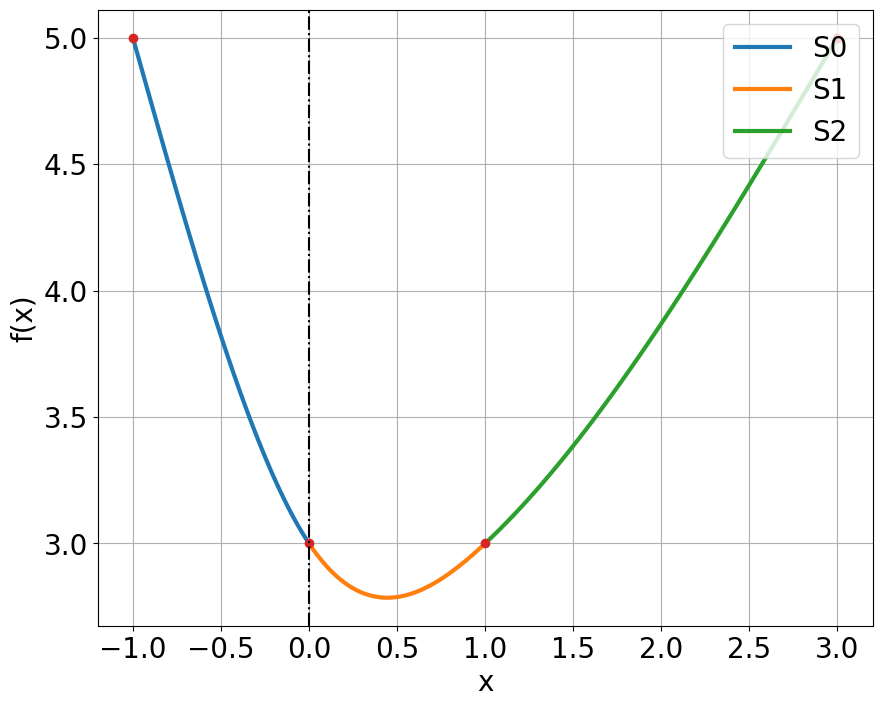

In [10]:
def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3
def s2(x):
    return a2 + b2*(x-1) + c2*(x-1)**2 + d2*(x-1)**3

xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)
xx2 = np.linspace(1,3)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(xx2, s2(xx2), lw=3, label = "S2")
plt.plot(_x, _y, 'o')
plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize= 20)
plt.grid()
plt.show()